In [31]:
import pandas as pd

# Load the dataset (assuming it's in a CSV file)
credit_data = pd.read_csv("C://Users//TmC//Downloads//CreditRisk.csv")

# Display the first few rows of the dataset to understand its structure
print(credit_data.head())

# Describe the features, target variable, and data distribution
# Features are the input variables, and the target variable is the credit risk outcome.

# Features
features = credit_data.drop('Loan_ID', axis=1)
print("Features:")
print(features.head())

# Target variable
target = credit_data['Loan_ID']
print("\nTarget Variable:")
print(target.head())

# Data distribution
print("\nData Distribution:")
print(credit_data['Loan_ID'].value_counts())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0           0             360.0   
1             4583             1508.0         128             360.0   
2             3000                0.0          66             360.0   
3             2583             2358.0         120             360.0   
4             6000                0.0         141             360.0   

   Credit_History Property_Area  Loan_Status  
0             1.0         Urban            1  
1             1.0         Rural            0  
2             1.0

In [32]:
import numpy as np
from scipy import stats

# Borrower's credit score (higher score may result in lower interest rate)
credit_score = 750

# Loan amount (e.g., $200,000)
loan_amount = 200000

# Annual interest rate for borrowers with good credit
good_credit_rate = 0.04  # 4% interest rate

# Calculate the monthly interest rate
monthly_interest_rate = good_credit_rate / 12

# Number of monthly payments (e.g., 30 years, 360 payments)
num_payments = 30 * 12

# Calculate the monthly payment
monthly_payment = loan_amount * (monthly_interest_rate * (1 + monthly_interest_rate) ** num_payments) / ((1 + monthly_interest_rate) ** num_payments - 1)

print(f"Monthly Payment for Good Credit Borrower: ${monthly_payment:.2f}")


Monthly Payment for Good Credit Borrower: $954.83


Sample data from the credit risk dataset:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0           0             360.0   
1             4583             1508.0         128             360.0   
2             3000                0.0          66             360.0   
3             2583             2358.0         120             360.0   
4             6000                0.0         141             360.0   

   Credit_History Property_Area  Loan_Status  
0             1.0         Urban            1  
1             1.0     

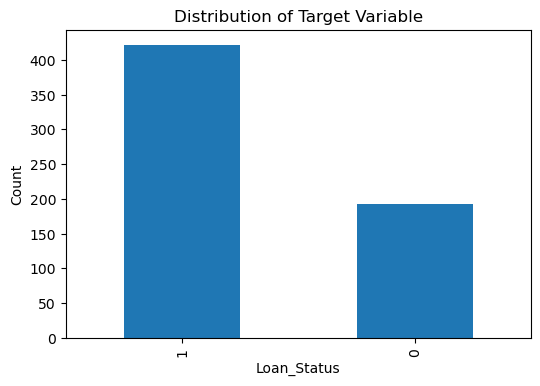

In [34]:
import pandas as pd

# Load the credit risk dataset (replace 'your_dataset.csv' with the actual file path)
credit_data = pd.read_csv("C://Users//TmC//Downloads//CreditRisk.csv")

# Display the first few rows of the dataset to understand its structure
print("Sample data from the credit risk dataset:")
print(credit_data.head())

# Get information about the dataset, including data types and missing values
print("\nDataset information:")
print(credit_data.info())

# Describe the statistical summary of numerical features
print("\nStatistical summary of numerical features:")
print(credit_data.describe())

# Count the number of unique values in the target variable
target_counts = credit_data['Loan_Status'].value_counts()
print("\nCounts of unique values in the target variable:")
print(target_counts)

# Visualize the data distribution of the target variable
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
target_counts.plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.show()


In [55]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C://Users//TmC//Downloads//CreditRisk.csv")

# Display the first few rows of the dataset to get an overview
print(df.head())

# Get information about the dataset, including data types and non-null counts
print(df.info())

# Summary statistics of numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Data distribution for categorical variables
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
for col in categorical_cols:
    print(f"Distribution for {col}:")
    print(df[col].value_counts())
    print("\n")

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0           0             360.0   
1             4583             1508.0         128             360.0   
2             3000                0.0          66             360.0   
3             2583             2358.0         120             360.0   
4             6000                0.0         141             360.0   

   Credit_History Property_Area  Loan_Status  
0             1.0         Urban            1  
1             1.0         Rural            0  
2             1.0

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer  # Import the imputer

# Load the dataset
df = pd.read_csv("C://Users//TmC//Downloads//CreditRisk.csv")

# Data preprocessing: Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Handle missing values with imputation
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy, such as median or mode
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Define features (X) and target variable (y)
X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7886178861788617
Precision: 0.7547169811320755
Recall: 1.0
F1-score: 0.8602150537634409


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer  # Import the imputer

# Load the dataset
df = pd.read_csv("C://Users//TmC//Downloads//CreditRisk.csv")

# Data preprocessing: Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Handle missing values with imputation
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy, such as median or mode
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Define features (X) and target variable (y)
X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the non-linear SVM model with a kernel (e.g., RBF kernel)
svm_model = SVC(kernel='rbf')  # You can change the kernel as needed (e.g., 'poly' for Polynomial kernel)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6504065040650406
Precision: 0.6504065040650406
Recall: 1.0
F1-score: 0.7881773399014779


In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid for linear SVM
linear_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Define the hyperparameter grid for non-linear SVM with RBF kernel
rbf_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# Create the GridSearchCV objects
linear_grid_search = GridSearchCV(SVC(kernel='linear'), param_grid=linear_param_grid, cv=5)
rbf_grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid=rbf_param_grid, cv=5)

# Fit the models
linear_grid_search.fit(X_train, y_train)
rbf_grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_linear_params = linear_grid_search.best_params_
best_rbf_params = rbf_grid_search.best_params_

# Train models with the best hyperparameters
best_linear_model = SVC(kernel='linear', **best_linear_params)
best_rbf_model = SVC(kernel='rbf', **best_rbf_params)

# Evaluate the models as before
best_linear_model.fit(X_train, y_train)
best_rbf_model.fit(X_train, y_train)
linear_accuracy = best_linear_model.score(X_test, y_test)
rbf_accuracy = best_rbf_model.score(X_test, y_test)

print("Best Linear SVM Accuracy:", linear_accuracy)
print("Best RBF SVM Accuracy:", rbf_accuracy)


Best Linear SVM Accuracy: 0.875
Best RBF SVM Accuracy: 0.875


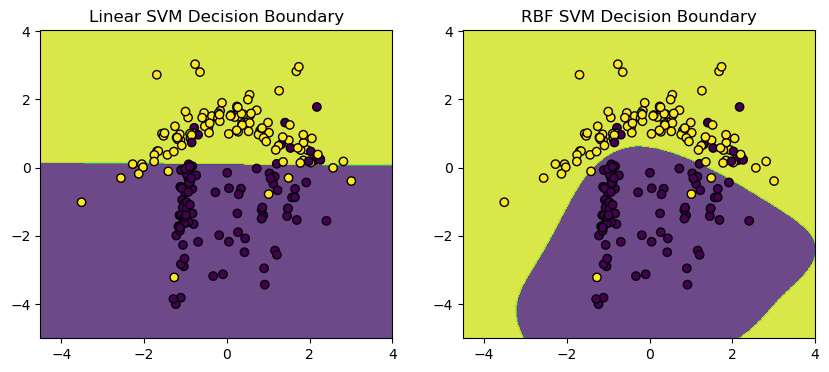

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder

# Create a synthetic dataset for visualization
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=1)

# Create a linear SVM model
linear_svm = SVC(kernel='linear')
linear_svm.fit(X, y)

# Create a non-linear SVM model (e.g., RBF kernel)
rbf_svm = SVC(kernel='rbf', gamma='auto')
rbf_svm.fit(X, y)

# Visualize decision boundaries for linear SVM
def plot_decision_boundary(model, ax, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plot_decision_boundary(linear_svm, axes[0], "Linear SVM Decision Boundary")
plot_decision_boundary(rbf_svm, axes[1], "RBF SVM Decision Boundary")

plt.show()

In [2]:
# Assuming you have already trained linear_svm and rbf_svm models as mentioned earlier

# Get support vectors for the linear SVM
linear_support_vectors = linear_svm.support_vectors_

# Get support vectors for the non-linear SVM (RBF kernel)
rbf_support_vectors = rbf_svm.support_vectors_

# Count the number of support vectors
num_linear_support_vectors = len(linear_support_vectors)
num_rbf_support_vectors = len(rbf_support_vectors)

print(f"Number of support vectors for Linear SVM: {num_linear_support_vectors}")
print(f"Number of support vectors for RBF SVM: {num_rbf_support_vectors}")

Number of support vectors for Linear SVM: 75
Number of support vectors for RBF SVM: 65


In [3]:
# Now, you can evaluate the models as previously shown
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have already trained linear_svm and rbf_svm models as mentioned earlier
# Replace X_test and y_test with your actual testing data
X_test, y_test = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Make predictions using both models
linear_predictions = linear_svm.predict(X_test)
rbf_predictions = rbf_svm.predict(X_test)

# Evaluate the linear SVM model
linear_accuracy = accuracy_score(y_test, linear_predictions)
linear_precision = precision_score(y_test, linear_predictions)
linear_recall = recall_score(y_test, linear_predictions)
linear_f1 = f1_score(y_test, linear_predictions)

# Evaluate the non-linear SVM model (RBF kernel)
rbf_accuracy = accuracy_score(y_test, rbf_predictions)
rbf_precision = precision_score(y_test, rbf_predictions)
rbf_recall = recall_score(y_test, rbf_predictions)
rbf_f1 = f1_score(y_test, rbf_predictions)

# Compare the performance metrics
print("Linear SVM:")
print("Accuracy:", linear_accuracy)
print("Precision:", linear_precision)
print("Recall:", linear_recall)
print("F1-score:", linear_f1)

print("\nNon-Linear SVM (RBF Kernel):")
print("Accuracy:", rbf_accuracy)
print("Precision:", rbf_precision)
print("Recall:", rbf_recall)
print("F1-score:", rbf_f1)

Linear SVM:
Accuracy: 0.54
Precision: 0.5434782608695652
Recall: 0.5
F1-score: 0.5208333333333334

Non-Linear SVM (RBF Kernel):
Accuracy: 0.51
Precision: 0.5098039215686274
Recall: 0.52
F1-score: 0.5148514851485149


In [5]:
import pandas as pd

# Load the credit risk dataset
df = pd.read_csv("C://Users//TmC//Downloads//CreditRisk.csv")

# Display the first few rows of the dataset to understand its structure
print(df.head())

# You can explore the dataset further, e.g., check for missing values, statistics, and more
# Example: Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Example: Get summary statistics of numerical columns
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0           0             360.0   
1             4583             1508.0         128             360.0   
2             3000                0.0          66             360.0   
3             2583             2358.0         120             360.0   
4             6000                0.0         141             360.0   

   Credit_History Property_Area  Loan_Status  
0             1.0         Urban            1  
1             1.0         Rural            0  
2             1.0